In [3]:
%cd ~/NetBeansProjects/ExpLosion/
from notebooks.common_imports import *

from gui.user_code import get_demsar_diagram, get_demsar_params
from gui.output_utils import *

/Volumes/LocalDataHD/m/mm/mmb28/NetBeansProjects/ExpLosion


# word2vec vs glove vs count @ wikipedia

wins [27, 29, 28, 30] 
glove [109, 111, 110, 112] 
w2v [34, 36, 35, 37]
id 27, score 0.40
id 29, score 0.28
id 28, score 0.40
id 30, score 0.27
id 109, score 0.40
id 111, score 0.29
id 110, score 0.33
id 112, score 0.28
id 34, score 0.53
id 36, score 0.35
id 35, score 0.47
id 37, score 0.34


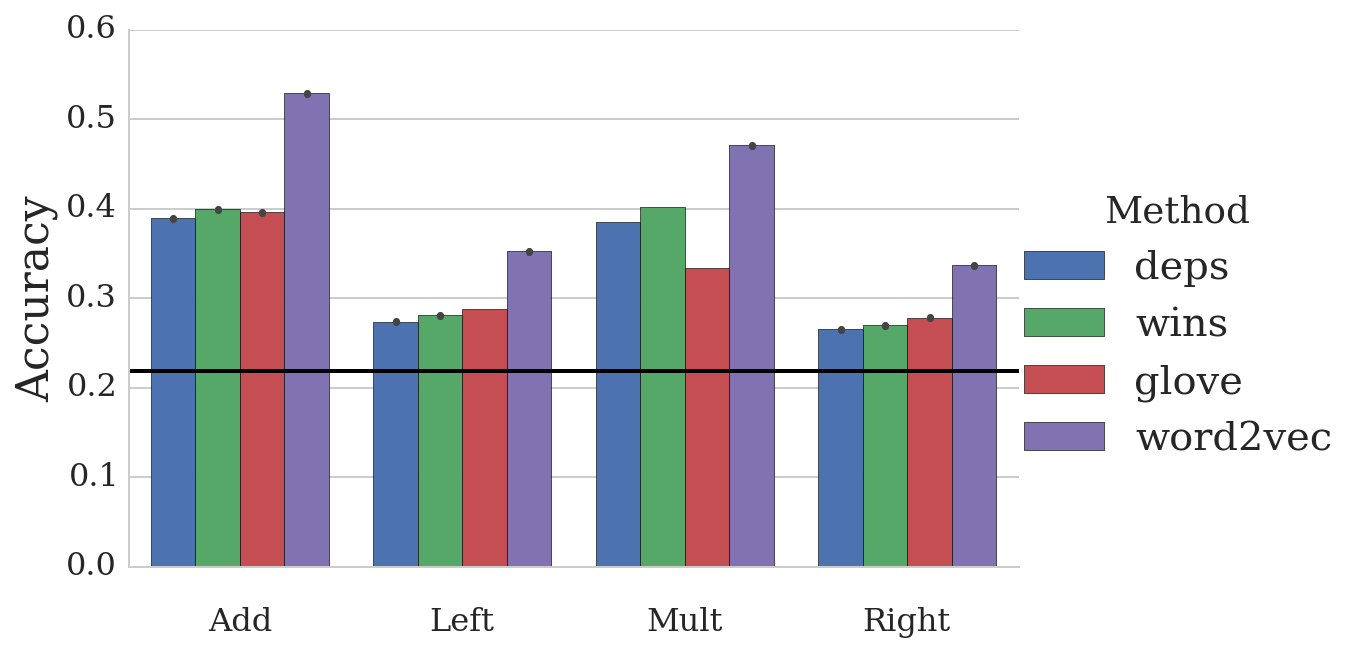

In [4]:
d = {'expansions__noise': 0.0, 
     'expansions__decode_handler': 'SignifiedOnlyFeatureHandler', 
     'expansions__k': 3, 
     'expansions__vectors__rep': 0,
     'expansions__vectors__unlabelled_percentage': 100.0,
     'expansions__vectors__unlabelled' : 'wiki',
     'expansions__allow_overlap': 0,
     'labelled': 'amazon_grouped-tagged', 
     'expansions__vectors__algorithm': 'word2vec', 
     'document_features_tr': 'J+N+AN+NN',
     'document_features_ev': 'AN+NN',
     'expansions__vectors__unlabelled_percentage':100,
     'expansions__entries_of':None,
     'expansions__vectors__composer__in': ['Add', 'Mult', 'Right', 'Left']
    }

def _get(d):
    return [x.id for x in Experiment.objects.filter(**d).\
            order_by('expansions__vectors__algorithm', 'expansions__vectors__composer')]

w2v = _get(d)
d['expansions__vectors__algorithm'] =  'glove'
glove = _get(d)
d['expansions__vectors__algorithm'] =  'count_windows'
wins = _get(d)
d['expansions__vectors__algorithm'] =  'count_dependencies'
deps = _get(d)

print('wins', wins, '\nglove', glove, '\nw2v', w2v)
order = ['deps', 'wins', 'glove', 'word2vec']
diff_plot_bar([deps, wins, glove, w2v], order,
           [Experiment.objects.get(id=id).expansions.vectors.composer for id in w2v],
             hue_order=order, xlabel='', 
            hline_at=random_vect_baseline())
plt.savefig('plot-w2v-vs-glove.pdf', format='pdf', dpi=300, bbox_inches='tight', pad_inches=0.1)

# sanity check
from itertools import chain
for id in chain.from_iterable([wins, glove, w2v]):
    print('id %d, score %.2f'%(id, Results.objects.get(id=id, classifier=CLASSIFIER).accuracy_mean))